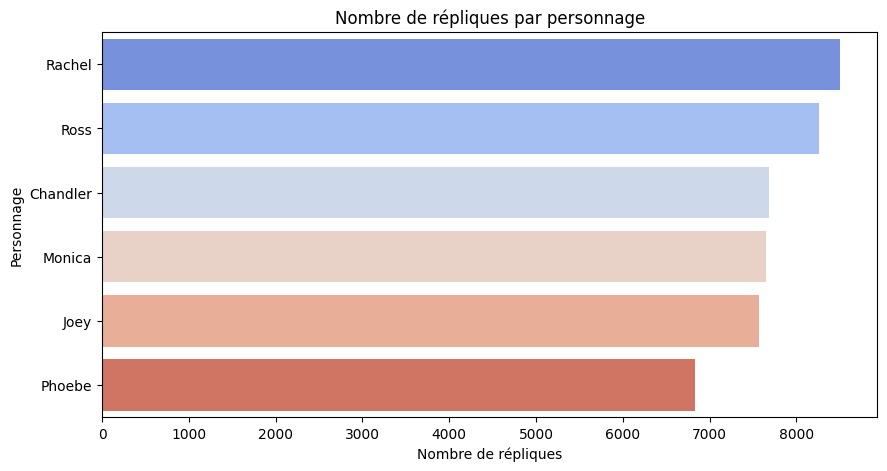

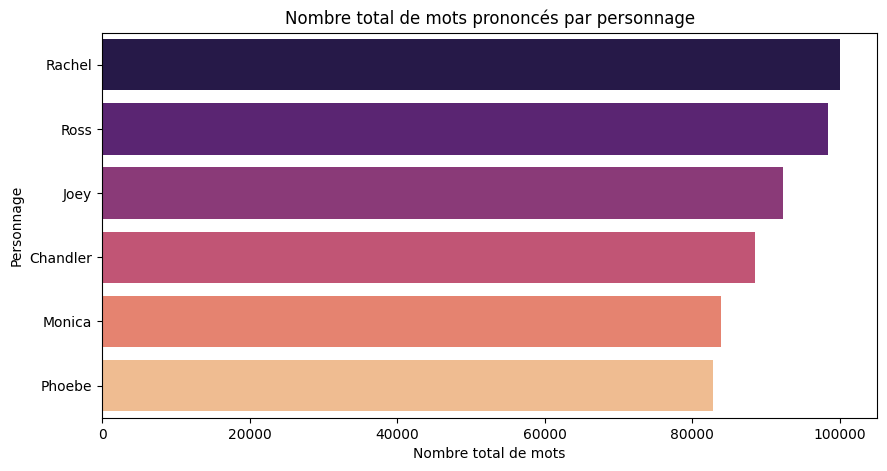

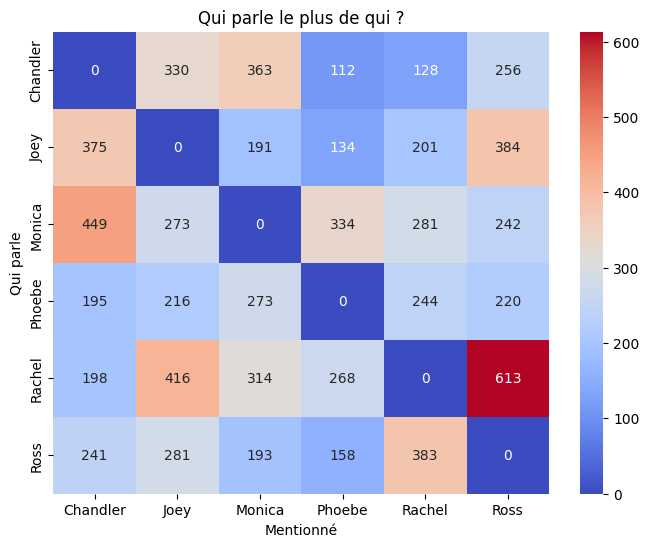

<Figure size 1000x600 with 0 Axes>

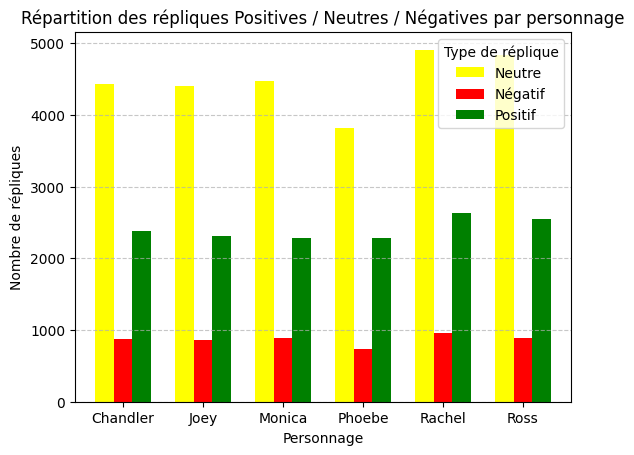

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from textblob import TextBlob

#Chargement des données
df = pd.read_csv("friends_dialogues.csv", names=["season", "episode", "character", "line"])

#Garder uniquement les 6 personnages principaux (sinon ça me fait un bug)
main_characters = ['Chandler','Joey','Monica','Phoebe','Rachel','Ross']
df = df[df["character"].isin(main_characters)]

# Répliques par perso
character_counts = df["character"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(y=character_counts.index, x=character_counts.values, hue=character_counts.index, dodge=False, legend=False, palette="coolwarm")
plt.xlabel("Nombre de répliques")
plt.ylabel("Personnage")
plt.title("Nombre de répliques par personnage")
plt.show()

# Nombre total de mot
df["word_count"] = df["line"].apply(lambda x: len(str(x).split()))
word_per_character = df.groupby("character")["word_count"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(y=word_per_character.index, x=word_per_character.values, hue=word_per_character.index, dodge=False, legend=False, palette="magma")
plt.xlabel("Nombre total de mots")
plt.ylabel("Personnage")
plt.title("Nombre total de mots prononcés par personnage")
plt.show()

#Matrice de lien entre personnages
mention_matrix = pd.DataFrame(0, index=main_characters, columns=main_characters)

for index, row in df.iterrows():
    speaker = row["character"]
    text = row["line"]
    for name in main_characters:
        if name in text and name != speaker:  # Éviter l'auto-mention
            mention_matrix.at[speaker, name] += 1

plt.figure(figsize=(8,6))
sns.heatmap(mention_matrix, annot=True, cmap="coolwarm", fmt="d")
plt.title("Qui parle le plus de qui ?")
plt.xlabel("Mentionné")
plt.ylabel("Qui parle")
plt.show()


# Catégorisation des sentiments (vu sur Interface)
def categorize_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positif"
    elif polarity < -0.1:
        return "Négatif"
    else:
        return "Neutre"

df["sentiment_category"] = df["line"].apply(categorize_sentiment)

# Compter le nombre de répliques par catégorie et par personnage
sentiment_counts = df.groupby(["character", "sentiment_category"]).size().unstack(fill_value=0)

# Définir une palette personnalisée
custom_palette = {"Positif": "green", "Neutre": "yellow", "Négatif": "red"}

# Afficher le graphique
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind="bar", stacked=False, color=[custom_palette[col] for col in sentiment_counts.columns], width=0.7)
plt.title("Répartition des répliques Positives / Neutres / Négatives par personnage")
plt.xlabel("Personnage")
plt.ylabel("Nombre de répliques")
plt.xticks(rotation=0)
plt.legend(title="Type de réplique")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
